In [2]:
import pandas as pd
import numpy as np
from pandas import Series, DataFrame

import pandas as pd
import math

import matplotlib.pyplot as plt #5matplotlibをimport
import seaborn as sns

#平均を0に分散を1に前処理
from sklearn.preprocessing import StandardScaler


In [3]:
dataset_train=pd.read_excel('moter_RandC_data.xlsx') #excle データをインポート

In [4]:
dataset_train.head()

,t h,Req MΩ,Ceq pF,DFeq,Req pu,Ceq pu,Dfeq pu,ANN output
0,48,590.0,12.5,0.36,0.941,0.82,1.30,good
1,96,364.2,10.1,0.72,0.581,0.66,2.62,good
2,144,270.6,9.2,"1,07",0.431,0.60,3.89,good
3,192,211.4,10.5,1.2,0.347,0.68,4.34,good
4,240,206.8,10.9,"1,18",0.339,0.71,4.28,good


In [5]:
dataset_train = dataset_train.dropna(how='any')

In [6]:
dataset_train

,t h,Req MΩ,Ceq pF,DFeq,Req pu,Ceq pu,Dfeq pu,ANN output
0,48,590.0,12.5,0.36,0.9410,0.82,1.30,good
1,96,364.2,10.1,0.72,0.5810,0.66,2.62,good
2,144,270.6,9.2,"1,07",0.4310,0.60,3.89,good
3,192,211.4,10.5,1.2,0.3470,0.68,4.34,good
4,240,206.8,10.9,"1,18",0.3390,0.71,4.28,good
5,288,225.1,14.6,0.81,0.3690,0.95,2.94,good
6,336,244.0,12.4,0.88,0.3990,0.81,3.18,good
7,384,235.3,13.5,0.84,0.3750,0.88,3.03,good
8,432,120.1,15.9,1.39,0.1920,1.04,5.04,thermal
9,480,76.6,14.1,2.45,0.1220,0.92,8.90,thermal


In [7]:
col_names = ['t h','Req MΩ','Cep pf','DFeq','Req pu','Ceq pu','DFeq pu','ANN output']
dataset_train.columns=col_names

In [8]:
dataset_train_for_graph = dataset_train.drop(['t h','Req MΩ','Cep pf','DFeq'], axis=1)

In [9]:
import seaborn as sns
# JupyterLab で実行する際は、この行を書くことで描画できるようになります。
%matplotlib inline


In [23]:
# import some data to play with
X = dataset_train.drop(['t h','Req MΩ','Cep pf','DFeq','ANN output'],axis=1) 
y = dataset_train['t h'] 

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
#平均を0に分散を1に前処理
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

In [26]:
X_scaled = pd.DataFrame(X_scaled, columns=(['Req MΩ','Cep pf','DFeq']))
X_scaled.head()

,Req MΩ,Cep pf,DFeq
0,1.928549,-0.366181,-0.263554
1,0.912619,-0.370026,-0.257082
2,0.489314,-0.371468,-0.250855
3,0.252264,-0.369545,-0.248648
4,0.229688,-0.368825,-0.248942


In [27]:
from sklearn.decomposition import PCA

In [28]:
pca = PCA(n_components=2)
pca.fit(X_scaled)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [29]:
x_pca = pca.transform(X_scaled)
print("Original shape: {}".format(str(X_scaled.shape)))
print("Reduced shape: {}".format(str(x_pca.shape)))

Original shape: (78, 3)
Reduced shape: (78, 2)


In [34]:
df_x_pca = pd.DataFrame(x_pca, columns=['Principal Component 1','Principal Component 2'])
df_x_pca["time"] = y
df_x_pca["ANN output"] = dataset_train['ANN output'] 

In [41]:
df_x_pca

,Principal Component 1,Principal Component 2,time,ANN output
0,-1.740485,-0.197189,48,good
1,-0.980120,-0.089287,96,good
2,-0.662092,-0.041538,144,good
3,-0.482810,-0.017398,192,good
4,-0.465581,-0.015817,240,good
5,-0.527677,-0.032832,288,good
6,-0.592645,-0.038326,336,good
7,-0.541193,-0.033188,384,good
8,-0.149220,0.023717,432,thermal
9,0.002968,0.060333,480,thermal


In [50]:
import seaborn as sns

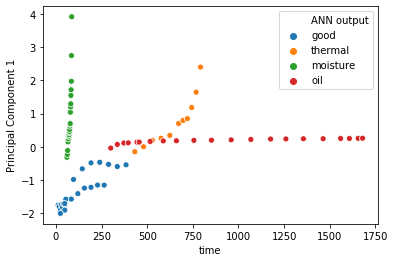

In [54]:

sns.scatterplot(data = df_x_pca, x="time", y="Principal Component 1", hue='ANN output')

In [32]:
df_x_pca

,Principal Component 1,Principal Component 2,time
0,-1.740485,-0.197189,48
1,-0.980120,-0.089287,96
2,-0.662092,-0.041538,144
3,-0.482810,-0.017398,192
4,-0.465581,-0.015817,240
5,-0.527677,-0.032832,288
6,-0.592645,-0.038326,336
7,-0.541193,-0.033188,384
8,-0.149220,0.023717,432
9,0.002968,0.060333,480
